In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

In [7]:
# Load data
lefse = pd.read_csv('lefse_de_output.csv',sep=',')
condition = (lefse['Pvalues'] < 0.05)
# Apply the condition to filter the data
lefse = lefse[condition]
lefse = lefse.assign(abs_LDAscore=abs(lefse['LDAscore']))
lefse = lefse.sort_values(by='abs_LDAscore', ascending=False).head(10)

# lefse = lefse.sort_values(by='LDAscore', ascending=True)
# lefse  = lefse.sort_values(by='LDAscore', ascending=False).head(10)
# Define the condition to filter the data (e.g., Category == 'X')
lefse

,Feature,Pvalues,FDR,Y16(B),O16(B),LDAscore,abs_LDAscore
0,Alistipes,0.000096,0.006207,0.0,936870.0,-5.67,5.67
9,Akkermansia,0.004465,0.026386,632250.0,138050.0,5.39,5.39
5,GCA_900066575,0.002520,0.023396,108290.0,22103.0,4.63,4.63
1,Anaeroplasma,0.000377,0.008218,68571.0,9613.7,4.47,4.47
12,Erysipelatoclostridium,0.009898,0.045954,5691.2,33692.0,-4.15,4.15
17,Acetatifactor,0.040993,0.133230,20148.0,41725.0,-4.03,4.03
8,ASF356,0.004465,0.026386,4529.2,23377.0,-3.97,3.97
18,Enterorhabdus,0.040993,0.133230,14267.0,26944.0,-3.80,3.80
2,Tyzzerella,0.001005,0.014227,6758.3,1235.1,3.44,3.44
6,Ruminococcaceae_UCG_009,0.003350,0.026386,2576.8,7795.7,-3.42,3.42


In [8]:
# Specify the columns to consider for finding the max
columns_to_check = ['Y16(B)', 'O16(B)']
# Find the column with the maximum value for each row
lefse['Response'] = lefse[columns_to_check].idxmax(axis=1)
lefse


,Feature,Pvalues,FDR,Y16(B),O16(B),LDAscore,abs_LDAscore,Response
0,Alistipes,0.000096,0.006207,0.0,936870.0,-5.67,5.67,O16(B)
9,Akkermansia,0.004465,0.026386,632250.0,138050.0,5.39,5.39,Y16(B)
5,GCA_900066575,0.002520,0.023396,108290.0,22103.0,4.63,4.63,Y16(B)
1,Anaeroplasma,0.000377,0.008218,68571.0,9613.7,4.47,4.47,Y16(B)
12,Erysipelatoclostridium,0.009898,0.045954,5691.2,33692.0,-4.15,4.15,O16(B)
17,Acetatifactor,0.040993,0.133230,20148.0,41725.0,-4.03,4.03,O16(B)
8,ASF356,0.004465,0.026386,4529.2,23377.0,-3.97,3.97,O16(B)
18,Enterorhabdus,0.040993,0.133230,14267.0,26944.0,-3.80,3.80,O16(B)
2,Tyzzerella,0.001005,0.014227,6758.3,1235.1,3.44,3.44,Y16(B)
6,Ruminococcaceae_UCG_009,0.003350,0.026386,2576.8,7795.7,-3.42,3.42,O16(B)


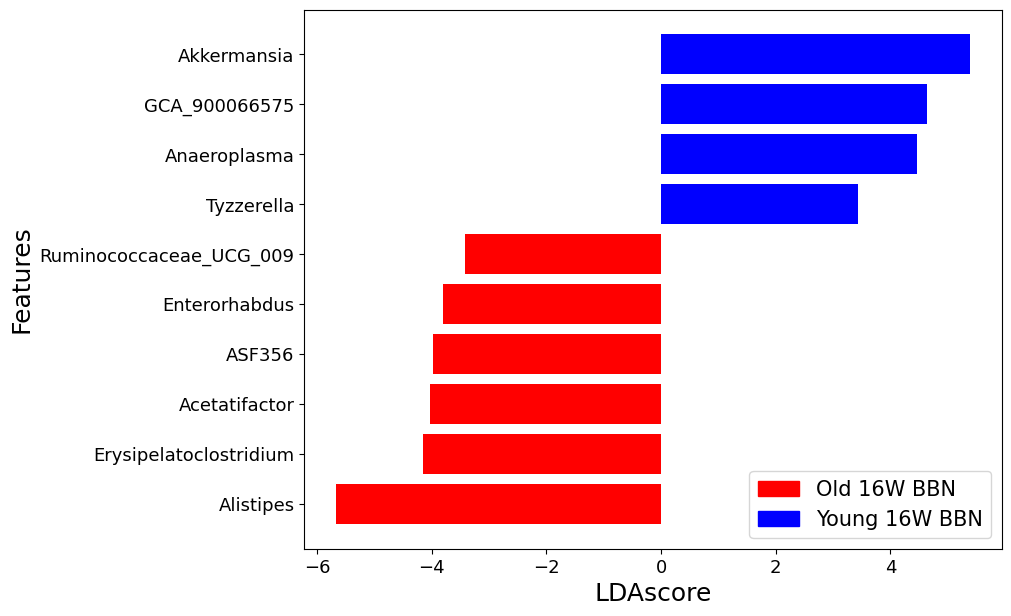

In [9]:
lefse = lefse.sort_values(by='LDAscore', ascending=True)
colors = lefse['Response'].map({'Y16(B)': 'blue', 'O16(B)': 'red'})
plt.figure(figsize=(9, 7))  # Adjust the figure size to fit the rotated chart
plt.barh(lefse['Feature'], lefse['LDAscore'], color=colors)  # Swap x and y
plt.yticks(fontsize=13) 
plt.xticks(fontsize=13) 
# max_value = lefse[['PBS-PBS', 'Lac-PBS', 'PBS-SCB34','Lac-SCB34']].max().max()
# Customize the plot
# plt.title('Rotated Bar Figure Based on Two Columns')
plt.xlabel('LDAscore',fontsize=18)
plt.ylabel('Features',fontsize=18)

# Create a legend for 'Category' colors
red_patch = mpatches.Patch(color='red', label='Old 16W BBN')
blue_patch = mpatches.Patch(color='blue', label='Young 16W BBN')
plt.legend(handles=[red_patch, blue_patch ], loc='lower right',fontsize=15)#title='Response'

plt.show()